In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
airbnb = pd.read_csv('/Users/inaya/Desktop/Airbnb.csv', encoding='unicode_escape')
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
#getting the feel of data
airbnb.head(10)  
airbnb.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#obtaining statistical details of data
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Observations

The min price listed as $0 which is unusual for rental or lodging listings and may indicate free offerings, data entry errors, or placeholder values.

The max value 1250 of minimum_nights is greater than 365 since the data is only for FY 2019.This might be an outlier, a special case, or an error.

Availability_365 is the availability of place with in a year.  the min and 1st quartile value is 0 which infact needs to be greater than or equal to 1.

These points suggest a need for careful data cleaning and validation. Outliers and anomalies might need to be investigated to ensure they represent accurate information and not data entry errors.

In [6]:
#checking for duplicated values
airbnb.duplicated().any()

False

No duplicated values found


In [7]:
#column last_review contains date of the latest review recieved. data type is converted to date and time.
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])
airbnb['last_review']

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [8]:
#checking for null values
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
#filling the null values in 'name' column with N/A
airbnb.fillna({'name':'N/A'},inplace = True)
#filling 'reviews_per_month' and 'last_review' with 0
airbnb.fillna({'reviews_per_month':0,'last_review':0},inplace = True)


In [10]:
#validating if nulls are removed
airbnb.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [11]:
#removing the missing values
airbnb.dropna(inplace=True)

In [12]:
#validating if nulls are removed
airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
#checking new number of rows
airbnb.shape

(48874, 16)

In [14]:
#dropping all rows with price equal to 0
price_0rows = airbnb[airbnb['price']==0].index
airbnb = airbnb.drop(index = price_0rows)
airbnb.shape

(48863, 16)

In [15]:
#dropping all rows from minimum_nights column having nights more than 365
min_365plus = airbnb[airbnb['minimum_nights']>365].index
airbnb.drop(index = min_365plus,inplace = True)
airbnb.shape

(48849, 16)

In [16]:
#drop all rows with availability_365 less than 1
no_availability = airbnb[airbnb['availability_365']<1].index
airbnb.drop(index = no_availability,inplace = True)
airbnb.shape
airbnb['availability_365']

0        365
1        355
2        365
3        194
5        129
        ... 
48890      9
48891     36
48892     27
48893      2
48894     23
Name: availability_365, Length: 31332, dtype: int64

In [17]:
#validating new number of rows
airbnb.shape

(31332, 16)

# Visualising of data as per problem statement

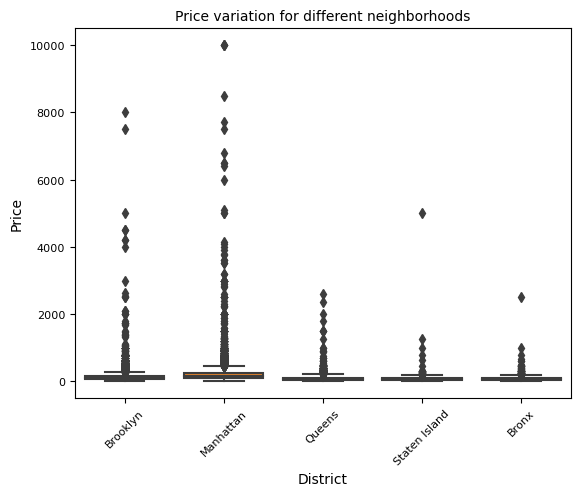

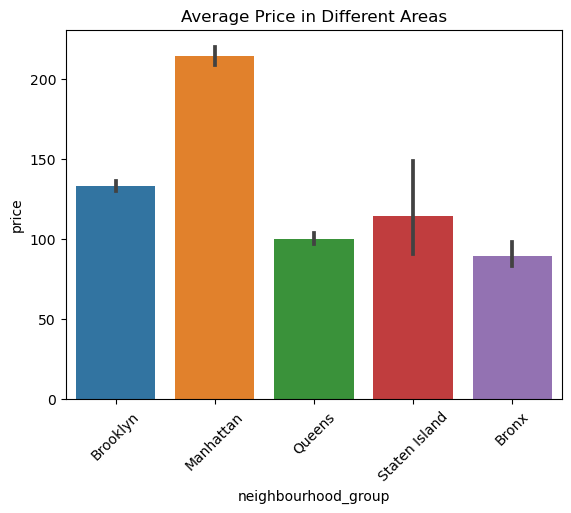

In [18]:
#identifying the pricing based on location

sns.boxplot(data=airbnb ,x= 'neighbourhood_group',y= 'price')
plt.title('Price variation for different neighborhoods',fontsize = 10)
plt.xlabel('District',fontsize = 10)
plt.ylabel('Price',fontsize = 10)
plt.xticks(rotation = 45,fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

# Average price in different areas
sns.barplot(x='neighbourhood_group', y='price', data= airbnb, estimator=np.mean)
plt.title('Average Price in Different Areas')
plt.xticks(rotation=45)
plt.show()

                                    Plot 1

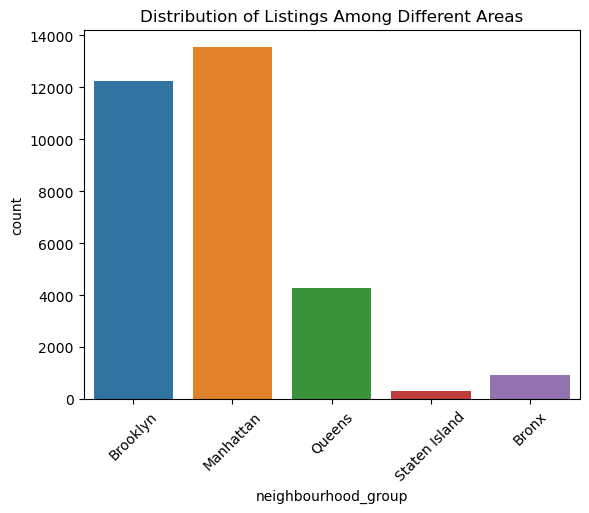

In [19]:
# Distribution of listings among different areas
sns.countplot(data=airbnb, x='neighbourhood_group')
plt.title('Distribution of Listings Among Different Areas')
plt.xticks(rotation=45)
plt.show()



                                          Plot 2

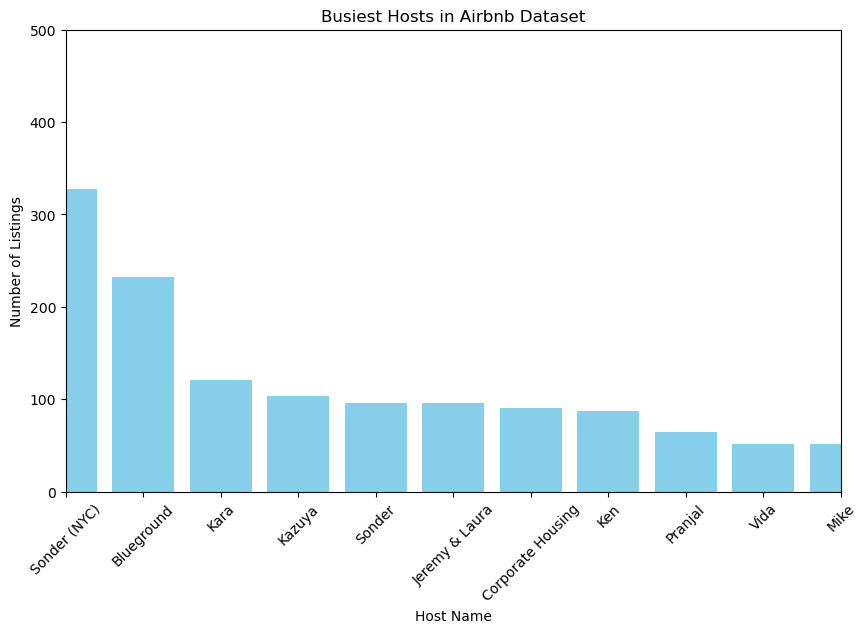

In [20]:
#identifying busiest hosts
busy_hosts = airbnb.sort_values(by='calculated_host_listings_count', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(busy_hosts['host_name'], busy_hosts['calculated_host_listings_count'], color='skyblue')
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.title('Busiest Hosts in Airbnb Dataset')
plt.xlim(0, 10)
plt.ylim(0, 500)
plt.xticks(rotation=45)
plt.show()


                                                    Plot 3

In [21]:
#avg price per host
average_price_per_host = airbnb.groupby('host_name')['price'].mean().sort_values(ascending=False)
average_price_per_host
average_price_per_host.head(10)





host_name
Jelena             10000.0
Rum                 8500.0
Jay And Liz         6000.0
Nony                4200.0
Tuvia               3000.0
Luxury Property     3000.0
Rogelio             2999.0
Viberlyn            2995.0
Ilo And Richard     2990.0
Lanie               2900.0
Name: price, dtype: float64

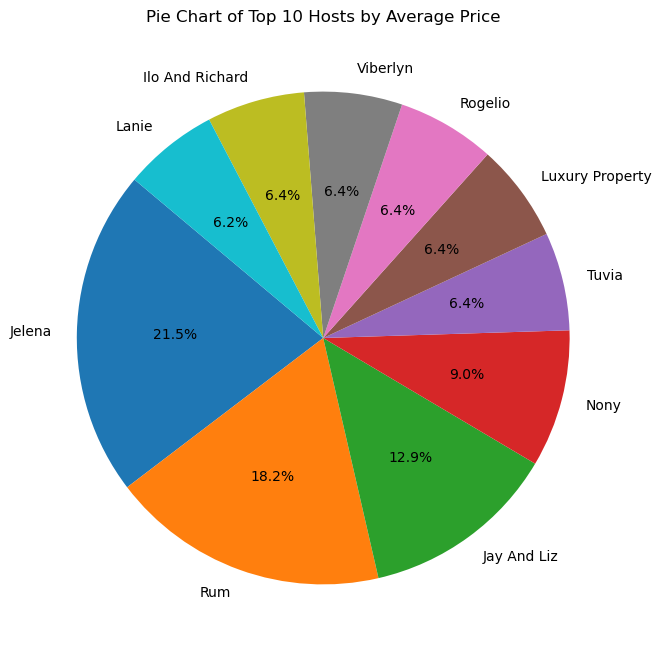

In [22]:


host_names = ['Jelena', 'Rum', 'Jay And Liz', 'Nony', 'Tuvia', 
              'Luxury Property', 'Rogelio', 'Viberlyn', 'Ilo And Richard', 'Lanie']
average_prices = [10000.0, 8500.0, 6000.0, 4200.0, 3000.0, 
                  3000.0, 2999.0, 2995.0, 2990.0, 2900.0]

# Creating the pie chart
plt.figure(figsize=(10, 8))
plt.pie(average_prices, labels=host_names, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Top 10 Hosts by Average Price')
plt.show()


                                   Plot 4

# Summary

Outcomes from Plot 1:

Price Distribution: The distribution of prices is skewed towards the lower end for all districts, as can be inferred from the fact that the median line is closer to the bottom of the box than the top in all cases.

Affordability: Staten Island and the Bronx appear to have lower prices and fewer high-priced outliers, which could make them more affordable options.

Comparative Analysis: When comparing districts, Manhattan is the most expensive in terms of both median price and the spread of the data. Brooklyn follows, with Queens, Staten Island, and the Bronx being less expensive.



Outcomes from Plot 2:

Brooklyn and Manhattan: These two areas have the highest number of listings, with Brooklyn slightly less than Manhattan, indicating they are popular or densely populated areas with many accommodations available.

Queens: The number of listings in Queens is significantly lower than in Manhattan and Brooklyn, but it still has a considerable count, suggesting a moderate level of accommodation availability.

Staten Island and Bronx: Both areas have relatively few listings compared to the others, indicating that they are less common choices for listings in this dataset. This could be due to various factors, such as fewer tourist attractions, lower population density, or other socio-economic reasons.

For businesses or individuals looking to enter the rental or hospitality market, Manhattan and Brooklyn could be highly competitive areas, while Queens, Staten Island, and the Bronx might offer opportunities for niche markets or budget accommodations



Outcomes from Plot 3: Above plot shows top 11 busiest hosts.

The presence of hosts with a very high number of listings, such as Sonder (NYC) and Blueground, suggests that these may be professional hosting companies or agencies with multiple properties.

The chart could indicate a market concentration where a few hosts control a large number of listings, which might have implications for competition and market dynamics within the Airbnb ecosystem.





# Recommendations:

To accomplish business objective of creating pricing strategy for Airbnb which would help the hosts to set the right prices for their listings and providing benefit of cost to customer below recommendations can be adopted.

1.Implementing a Minimum and Maximum Price Threshold: Set a minimum price to ensure hosts cover their costs and a maximum price to keep listings attractive to customers.

2.Promotions and Discounts: Offer discounts or promotions for longer stays or last minute bookings to maximize occupancy.

Furthermore, below mentioned analysis can be performed to come up with more accurate pricing strategy to provide customers benefit of low cost.

1.Demand Analysis: Investigate to indentify patterns in the demand based on historical occupancy, seasonal and special events.

2.Price Sensitivity Analysis: Analyze how changes in price affect booking rates to understand the sensitivity/elasticity in price.

3.Local Market Analysis: stay up to date with local events and compititors pricing strategy to stay dominant in market.

# Assumptions:

Availability and access to comprehensive and accurate data. 

A relatively stable market without drastic changes in demand or supply.

Behavioural patterns of customers can be predicted from historical data.

Hosts adhere to pricing strategy and comfortable using digital tools for booking and pricing.




# Exclusions: 

Non-Quanlitative factors like host reputation or guest experiences.

Inability to analyze real-time market trendz due to data unavailability.

The analysis might not fully account for unpredictable external market factors like economic downturns, natural disasters, or significant political changes.

# Constraints:

Limited by the scope, granularity and timelines of data collected.

Resource availability.

Regulatory and Legal Constraints.

Resistence from hosts/guests to price driven code or algorithm